<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/cost_heartparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
df= pd.read_csv("/gdrive/My Drive/df1_heart.csv")

In [4]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,60.0,69.66,0
1,1,97.5,100.0,37.0,120.0,78.0,60.0,69.66,0
2,2,96.0,100.0,37.0,120.0,70.0,60.0,69.66,0
3,3,100.0,99.0,37.0,120.0,75.0,60.0,69.66,0
4,4,102.0,100.0,36.0,120.0,74.0,60.0,69.66,0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
pd.crosstab(df.SepsisLabel, columns='count')

col_0,count
SepsisLabel,
0,973683
1,20124


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


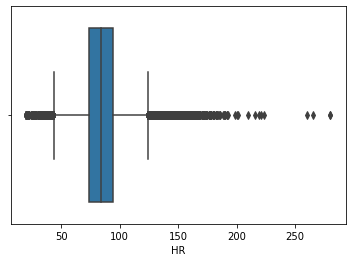

In [7]:
sns.boxplot(df['HR'])

In [8]:
print(df['HR'].quantile(0.10))
print(df['HR'].quantile(0.90))

64.0
106.0


In [9]:
df["HR"] = np.where(df["HR"] <64.0, 64.0,df['HR'])
df["HR"] = np.where(df["HR"] >106.0, 106.0,df['HR'])
print(df['HR'].skew())

0.11335757383538864


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


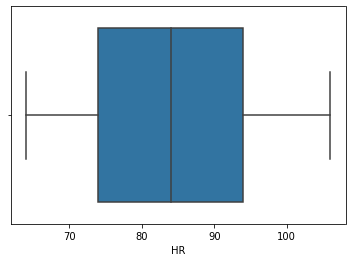

In [10]:
sns.boxplot(df['HR'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
col_names = df.columns
feature_cols = col_names[:-1]
df_negative = df[df[col_names[-1]]==0]
df_positive = df[df[col_names[-1]]==1]
X = df[feature_cols]
y = df[col_names[-1]]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.020542963269624417
0.019564437199598852


In [13]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.class_prior_

array([0.97945704, 0.02054296])

In [14]:
y_pred_nb = gnb.predict(X_test)
def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
print('Gaussian NB')
display_summary(y_test,y_pred_nb)

Gaussian NB
confusion matrix
[[   203   2494]
 [  5630 289816]]
sensitivity is %f 0.03480198868506772
specificity is %f 0.9914679620950361
accuracy is %f 0.9727513307372636
balanced accuracy is % 0.5131349753900519


In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logistic = logreg.predict(X_test)
logreg.intercept_
print('Logistic Regression')
display_summary(y_test,y_pred_logistic)

Logistic Regression
confusion matrix
[[     0      8]
 [  5833 292302]]
sensitivity is %f 0.0
specificity is %f 0.9999726317950122
accuracy is %f 0.980408730038941
balanced accuracy is % 0.4999863158975061


In [16]:
clf_random = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_random = clf_random.fit(X_train, y_train)
y_pred_rf = clf_random.predict(X_test)
print('Random Forest')
display_summary(y_test,y_pred_rf)

Random Forest
confusion matrix
[[     0      0]
 [  5833 292310]]
sensitivity is %f 0.0
specificity is %f 1.0
accuracy is %f 0.9804355628004011
balanced accuracy is % 0.5


In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
print('Decision Tree')
display_summary(y_test,y_pred_tree)

Decision Tree
confusion matrix
[[  3255   3282]
 [  2578 289028]]
sensitivity is %f 0.5580318875364306
specificity is %f 0.9887721939037324
accuracy is %f 0.9803450022304733
balanced accuracy is % 0.7734020407200815


In [18]:
!pip install costcla

In [19]:
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression, CostSensitiveRandomForestClassifier, CostSensitiveDecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / function

In [21]:
col_names

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age', 'SepsisLabel'], dtype='object')

In [23]:
cost_mat_train = np.zeros((len(y_train),4))
#false positives cost 5
cost_mat_train[:,0]=5
#false negatives cost the HR
cost_mat_train[:,1]=X_train['HR']
#true positives also cost 5
cost_mat_train[:,2]=5
 
cost_mat_test = np.zeros((len(y_test),4))
cost_mat_test[:,0]=5
cost_mat_test[:,1]=X_test['HR']
cost_mat_test[:,2]=5

In [24]:
f = CostSensitiveLogisticRegression()
f.fit(np.array(X_train),np.array(y_train), cost_mat_train)
y_pred_logistic_cslr = f.predict(X_test)
 
g = CostSensitiveRandomForestClassifier()
g.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_rf_cslr=g.predict(np.array(X_test))
 
h = CostSensitiveDecisionTreeClassifier()
h.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_tree_cslr = h.predict(np.array(X_test))

/usr/local/lib/python3.6/dist-packages/costcla/models/regression.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [25]:
print('naive: logistic regression')
print(cost_loss(y_test,y_pred_logistic,cost_mat_test))
print('naive: random forest')
print(cost_loss(y_test,y_pred_rf,cost_mat_test))
print('naive: decision tree')
print(cost_loss(y_test,y_pred_tree,cost_mat_test))
print('logistic: cost sensitve learning')
print(cost_loss(y_test,y_pred_logistic_cslr,cost_mat_test))
print('random forest: cost sensitve learning')
print(cost_loss(y_test,y_pred_rf_cslr,cost_mat_test))
print('decision tree: cost sensitve learning')
print(cost_loss(y_test,y_pred_tree_cslr,cost_mat_test))

naive: logistic regression
517163.0
naive: random forest
517123.0
naive: decision tree
260550.0
logistic: cost sensitve learning
1490715.0
random forest: cost sensitve learning
517123.0
decision tree: cost sensitve learning
192910.5


In [26]:
cost_mat_train = np.zeros((len(y_train),4))
#false positives cost 5
cost_mat_train[:,0]=5
#false negatives cost the Age
cost_mat_train[:,1]=X_train['Age']
#true positives also cost 5
cost_mat_train[:,2]=5
 
cost_mat_test = np.zeros((len(y_test),4))
cost_mat_test[:,0]=5
cost_mat_test[:,1]=X_test['Age']
cost_mat_test[:,2]=5

In [27]:
f = CostSensitiveLogisticRegression()
f.fit(np.array(X_train),np.array(y_train), cost_mat_train)
y_pred_logistic_cslr = f.predict(X_test)
 
g = CostSensitiveRandomForestClassifier()
g.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_rf_cslr=g.predict(np.array(X_test))
 
h = CostSensitiveDecisionTreeClassifier()
h.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_tree_cslr = h.predict(np.array(X_test))

/usr/local/lib/python3.6/dist-packages/costcla/models/regression.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [28]:
print('naive: logistic regression')
print(cost_loss(y_test,y_pred_logistic,cost_mat_test))
print('naive: random forest')
print(cost_loss(y_test,y_pred_rf,cost_mat_test))
print('naive: decision tree')
print(cost_loss(y_test,y_pred_tree,cost_mat_test))
print('logistic: cost sensitve learning')
print(cost_loss(y_test,y_pred_logistic_cslr,cost_mat_test))
print('random forest: cost sensitve learning')
print(cost_loss(y_test,y_pred_rf_cslr,cost_mat_test))
print('decision tree: cost sensitve learning')
print(cost_loss(y_test,y_pred_tree_cslr,cost_mat_test))

naive: logistic regression
364514.72000000003
naive: random forest
364474.72000000003
naive: decision tree
195799.26
logistic: cost sensitve learning
364474.72000000003
random forest: cost sensitve learning
364474.72000000003
decision tree: cost sensitve learning
148925.3
